# Test the python script by downloading a map of Chicago

### Data sets

After trying a few different data sources for optical satellite images, it appears that the Sentinal S2 Surface Reflectance data set is the best option.  (https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2_SR).  It will provide RGB images at 10m resolution.  There are higher resolution image sets (e.g., https://developers.google.com/earth-engine/datasets/catalog/SKYSAT_GEN-A_PUBLIC_ORTHO_RGB), but I can't get that to work -- and it apparently only has images 2014-2016.

### Documentation

The online documention for Earth Engine is not great, especially for python.  But I've found that the javascript tutorials can also be helpful, since the syntax is very similar.  I pieced together methods from various tutorials with a LOT of trial and error to make this work.  

Here are available data sets : https://developers.google.com/earth-engine/datasets

Some tutorials can be found here: https://developers.google.com/earth-engine/tutorials/community/explore

Here's an intro in python : https://developers.google.com/earth-engine/tutorials/community/intro-to-python-api-guiattard

### Getting started

To get started, you have to install Google Earth Engine API:

```
conda install -c conda-forge earthengine-api
conda install -c anaconda pyasn1-modules
conda install -c conda-forge rasterio
```

In order to use the API you need to sign up here (link in upper right) : https://earthengine.google.com/ .  There is a short application.  When I applied, it took about 5 minutes to get access.

In [7]:
import zipfile
import os
import requests

import numpy as np
import matplotlib.pyplot as plt

import ee
import rasterio
from rasterio.plot import show as showRasterio

#my script
from EarthEngineToGeoTIFF import getSentinalS2SRImage

%matplotlib inline

In [2]:
# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

Enter verification code: 4/1AX4XfWim-R8hBPb8qHz2_1eXhfAVx7eerja5BCdqxlhFVkDyS-sxaepe_3c

Successfully saved authorization token.


In [3]:
#Chicago central latitude, longitude and approximate size
lat = 41.8781
lon = -87.6298
sze = 0.65
_ = getSentinalS2SRImage(lon, lat, sze, 'ChicagoGeoTIFF.tif')

Creating 3-band GeoTIFF image ... 


## Plot the final result

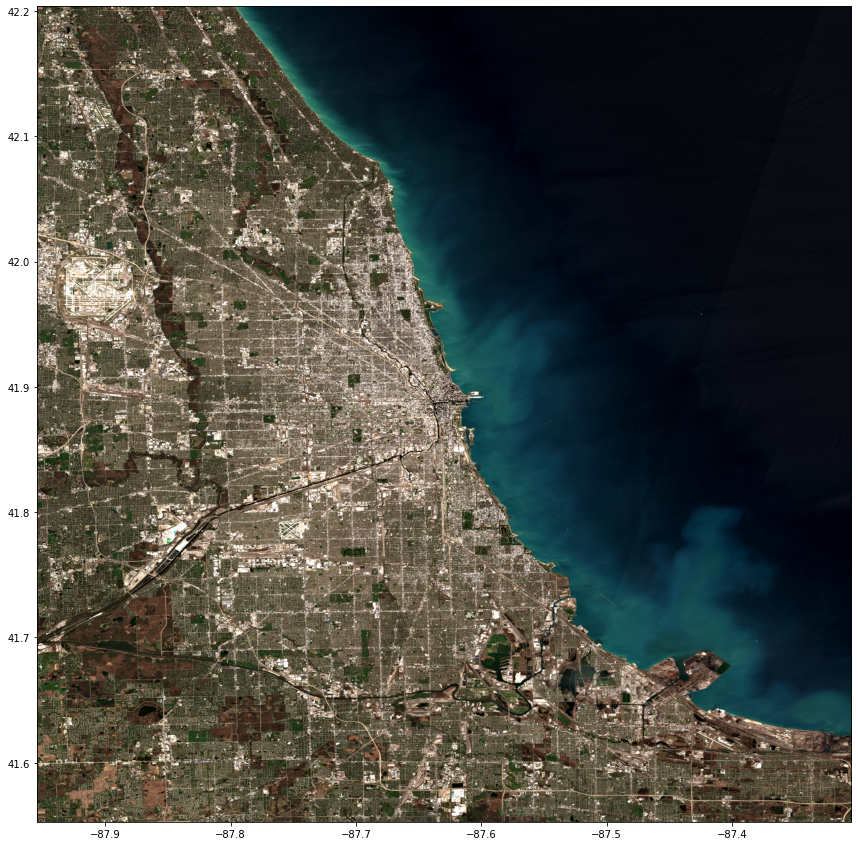

In [8]:
f,ax = plt.subplots(figsize=(15,15))

chicago = rasterio.open('ChicagoGeoTIFF.tif')
showRasterio(chicago.read(), ax = ax, transform=chicago.transform)

chicago.close()